In [1]:
# Code adopted from scikit-learn examples: see
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

import numpy as np
import pandas as pd
from time import time
import math
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation

# https://www.kaggle.com/datasets/therohk/million-headlines
abc_df = pd.read_csv('abcnews-date-text.csv')

n_samples = 2000
n_features = 1000
n_topics = [2, 5, 10, 20, 50, 100, 200]
n_top_words = 20
batch_size = 128
init = "nndsvda"

abc_data_samples = abc_df['headline_text'][:n_samples]

perplexity_lda = [0 for n in n_topics]
log_likelihood_lda = [0 for n in n_topics]

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
abc_tf = tf_vectorizer.fit_transform(abc_data_samples)

for i in range(len(n_topics)):
    topics = n_topics[i]
    lda = LatentDirichletAllocation(
        n_components=topics,
        max_iter=5,
        learning_method="online",
        learning_offset=50.0,
        random_state=0,
    )
    lda.fit(abc_tf)
    perplexity_lda[i] = lda.perplexity(abc_tf)
    log_likelihood_lda[i] = lda.score(abc_tf)

perplexity_lda

Extracting tf features for LDA...


[1054.7233824983284,
 1253.3920622269356,
 1479.6622564058428,
 1963.0794548478318,
 15979.250683378881,
 16323258.67873414,
 1.1947310461499782e+17]

In [7]:
log_likelihood_lda

[-43353.31859886436,
 -44428.1156361562,
 -45461.71657641853,
 -47222.375502839095,
 -60281.10052653903,
 -103435.25652508483,
 -244896.59187969958]

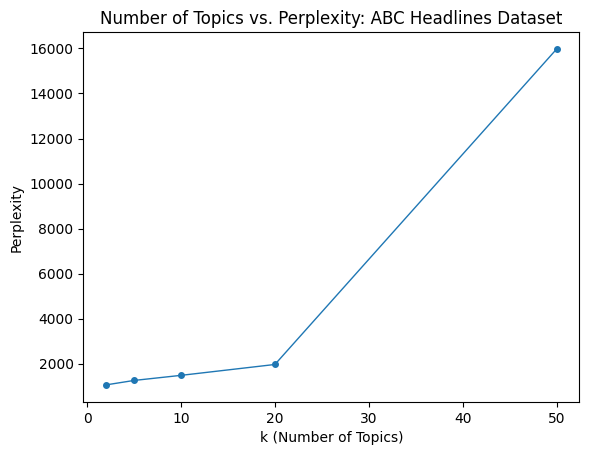

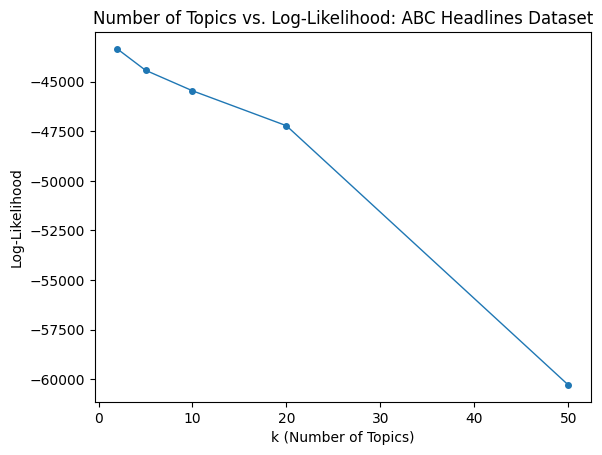

In [2]:
plt.plot(n_topics[:-2], perplexity_lda[:-2], linestyle='-', marker='o', markersize=4, linewidth=1)
plt.title("Number of Topics vs. Perplexity: ABC Headlines Dataset")
plt.xlabel("k (Number of Topics)")
plt.ylabel("Perplexity")

plt.show()


plt.plot(n_topics[:-2], log_likelihood_lda[:-2], linestyle='-', marker='o', markersize=4, linewidth=1)
plt.title("Number of Topics vs. Log-Likelihood: ABC Headlines Dataset")
plt.xlabel("k (Number of Topics)")
plt.ylabel("Log-Likelihood")

plt.show()

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
perplexity_lda_20newsgroups = [0 for n in n_topics]
log_likelihood_lda_20newsgroups = [0 for n in n_topics]

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)

for i in range(len(n_topics)):
    topics = n_topics[i]
    print("Running LDA on topics = " + str(topics))
    lda = LatentDirichletAllocation(
        n_components=topics,
        max_iter=5,
        learning_method="online",
        learning_offset=50.0,
        random_state=0,
    )
    lda.fit(tf)
    perplexity_lda_20newsgroups[i] = lda.perplexity(tf)
    log_likelihood_lda_20newsgroups[i] = lda.score(tf)

perplexity_lda_20newsgroups

Extracting tf features for LDA...
Running LDA on topics = 2
Running LDA on topics = 5
Running LDA on topics = 10
Running LDA on topics = 20
Running LDA on topics = 50
Running LDA on topics = 100
Running LDA on topics = 200


[687.7517972830408,
 638.4332129221797,
 624.8908021187776,
 661.4352547465654,
 817.4858649692386,
 1518.3271989972498,
 9147.012279031936]

In [4]:
log_likelihood_lda_20newsgroups

[-534597.7471703417,
 -528509.0717557262,
 -526754.7313040353,
 -531405.2702741649,
 -548737.5653071711,
 -599397.9486447612,
 -746340.7644502751]

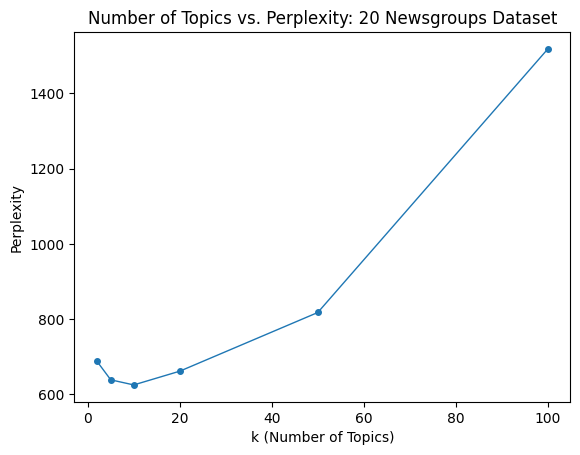

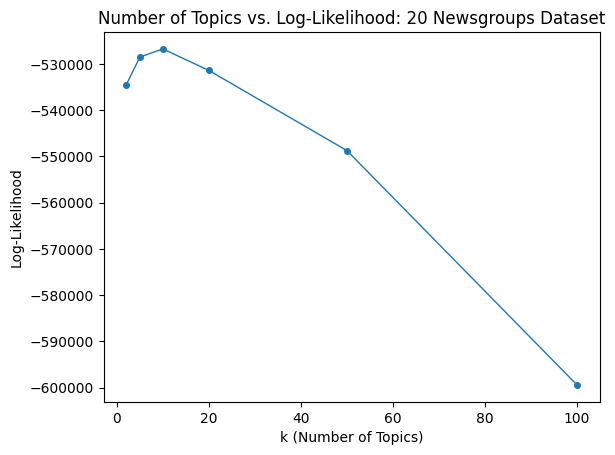

In [6]:
plt.plot(n_topics[:-1], perplexity_lda_20newsgroups[:-1], linestyle='-', marker='o', markersize=4, linewidth=1)
plt.title("Number of Topics vs. Perplexity: 20 Newsgroups Dataset")
plt.xlabel("k (Number of Topics)")
plt.ylabel("Perplexity")

plt.show()


plt.plot(n_topics[:-1], log_likelihood_lda_20newsgroups[:-1], linestyle='-', marker='o', markersize=4, linewidth=1)
plt.title("Number of Topics vs. Log-Likelihood: 20 Newsgroups Dataset")
plt.xlabel("k (Number of Topics)")
plt.ylabel("Log-Likelihood")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a809945-6c8f-453a-8cfa-9f77d6648913' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>